In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
installs = pd.read_csv('/home/fede/Desktop/Datos/installs.csv.gzip', compression = 'gzip')

In [6]:
installs.loc[:,'created'] = pd.to_datetime(installs['created'], errors = 'coerce')

In [7]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [8]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'click_hash',
       'attributed', 'implicit', 'device_countrycode', 'device_brand',
       'device_model', 'session_user_agent', 'user_agent', 'event_uuid',
       'kind', 'wifi', 'trans_id', 'ip_address', 'device_language'],
      dtype='object')

In [9]:
installs.count()

created               3412
application_id        3412
ref_type              3412
ref_hash              3412
click_hash               0
attributed            3412
implicit              3412
device_countrycode    3412
device_brand          1047
device_model          3411
session_user_agent    3364
user_agent            1729
event_uuid             865
kind                   865
wifi                  1729
trans_id                 6
ip_address            3412
device_language       3378
dtype: int64

In [10]:
installs.dtypes

created               datetime64[ns]
application_id                 int64
ref_type                       int64
ref_hash                       int64
click_hash                   float64
attributed                      bool
implicit                        bool
device_countrycode             int64
device_brand                 float64
device_model                 float64
session_user_agent            object
user_agent                    object
event_uuid                    object
kind                          object
wifi                          object
trans_id                      object
ip_address                     int64
device_language              float64
dtype: object

In [11]:
implicit = installs[installs['implicit'] == True]

In [12]:
implicit['device_countrycode'].value_counts()

6333597102633388268    520
2970470518450881158    345
Name: device_countrycode, dtype: int64

In [13]:
implicit['application_id'].value_counts()

9     196
7     172
10    142
8     102
16     93
2      39
29     26
20     26
15     20
6      12
0       9
12      8
17      6
24      5
21      3
5       3
33      1
30      1
34      1
Name: application_id, dtype: int64

In [14]:
implicit['session_user_agent'].value_counts()

http-kit/2.0                         498
adjust.com                           345
HasOffers Mobile AppTracking v1.0     22
Name: session_user_agent, dtype: int64

In [15]:
implicit['created'].max()

Timestamp('2019-03-13 23:46:39.961000')

In [16]:
implicit['created'].min()

Timestamp('2019-03-05 00:00:38.219000')

In [17]:
(implicit['created'] < '2019-03-11').sum()

542

In [18]:
dates = implicit['created'].dt.day

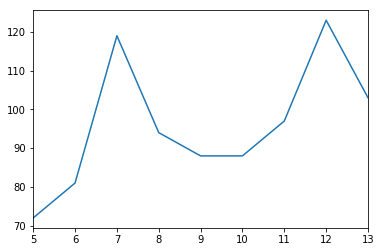

In [19]:
p = dates.value_counts()
p.sort_index().plot()
plt.show()

In [20]:
dates.value_counts()

12    123
7     119
13    103
11     97
8      94
10     88
9      88
6      81
5      72
Name: created, dtype: int64

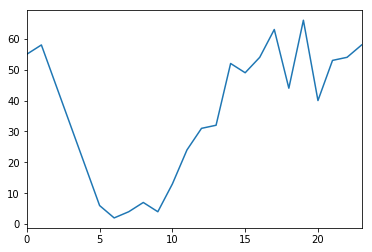

In [21]:
times = implicit['created'].dt.hour
q = times.value_counts()
q.sort_index().plot()
plt.show()

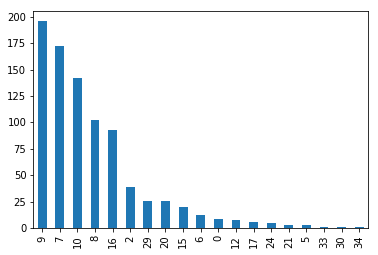

In [22]:
apps = implicit['application_id']
r = apps.value_counts()
r.plot(kind = 'bar')
plt.show()

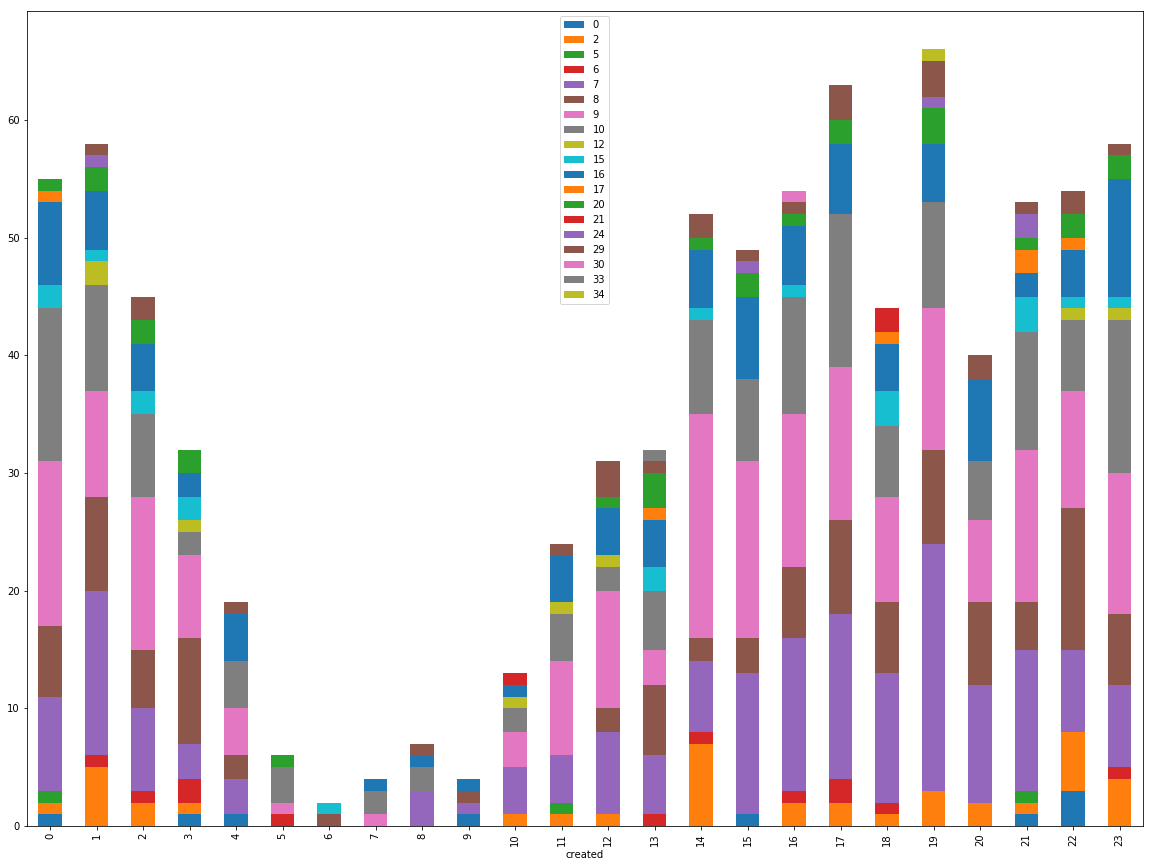

In [59]:
app = implicit[['created','application_id']].groupby([implicit['created'].dt.hour]).agg({'application_id' : 'value_counts'})
app['application_id'].unstack().plot(kind = 'bar', stacked = True, figsize = (20,15)).legend(loc = 'best')
plt.show()

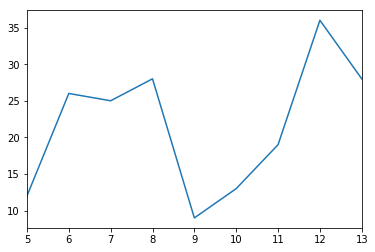

In [25]:
days = app9['created'].dt.day
r = days.value_counts()
r.sort_index().plot()
plt.show()

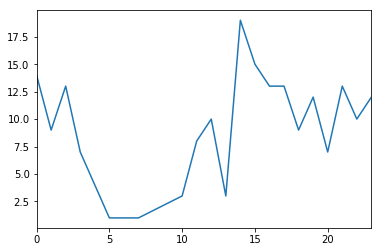

In [26]:
hour = app9['created'].dt.hour
r = hour.value_counts()
r.sort_index().plot()
plt.show()